In [ ]:
import pandas as pd

df = pd.read_csv('spotify_churn_dataset.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
print("Shape of the dataset (rows, columns):")
print(df.shape)

Shape of the dataset (rows, columns):
(8000, 12)


In [ ]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn (Machine Learning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [ ]:
df_strings = df[['country','gender','subscription_type','device_type']]

In [ ]:
df_strings.describe()

,country,gender,subscription_type,device_type
count,8000,8000,8000,8000
unique,8,3,4,3
top,AU,Male,Premium,Desktop
freq,1034,2691,2115,2778


In [ ]:
for column in df_strings.columns:
    print(f"Unique values in column '{column}':")
    print(df_strings[column].unique())
    print()

Unique values in column 'country':
['CA' 'DE' 'AU' 'US' 'UK' 'IN' 'FR' 'PK']

Unique values in column 'gender':
['Female' 'Other' 'Male']

Unique values in column 'subscription_type':
['Free' 'Family' 'Premium' 'Student']

Unique values in column 'device_type':
['Desktop' 'Web' 'Mobile']



In [ ]:
for column in df_strings.columns:
  for value in range(len(df_strings[column].unique())):
    df_strings[column] = df_strings[column].replace(df_strings[column].unique()[value],value)

/tmp/ipython-input-2156949967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strings[column] = df_strings[column].replace(df_strings[column].unique()[value],value)
/tmp/ipython-input-2156949967.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_strings[column] = df_strings[column].replace(df_strings[column].unique()[value],value)


In [ ]:
for column in df_strings.columns:
    print(f"Unique values in column '{column}':")
    print(df_strings[column].unique())
    print()

Unique values in column 'country':
[0 1 2 3 4 5 6 7]

Unique values in column 'gender':
[0 1 2]

Unique values in column 'subscription_type':
[0 1 2 3]

Unique values in column 'device_type':
[0 1 2]



In [ ]:
df_strings

,country,gender,subscription_type,device_type
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,0,0,3,2
4,3,1,1,2
...,...,...,...,...
7995,1,1,3,2
7996,2,2,2,2
7997,3,0,0,0
7998,5,0,3,0


In [ ]:
for col in df.columns:
  if col in df_strings.columns:
    df[col]=df_strings[col]

In [ ]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,0,54,0,0,26,23,0.20,0,31,0,1
1,2,1,33,1,1,141,62,0.34,1,0,1,0
2,3,2,38,2,2,199,38,0.04,2,0,1,1
3,4,0,22,0,3,36,2,0.31,2,0,1,0
4,5,1,29,3,1,250,57,0.36,2,0,1,1


In [ ]:
correlation_matrix = df.corr()


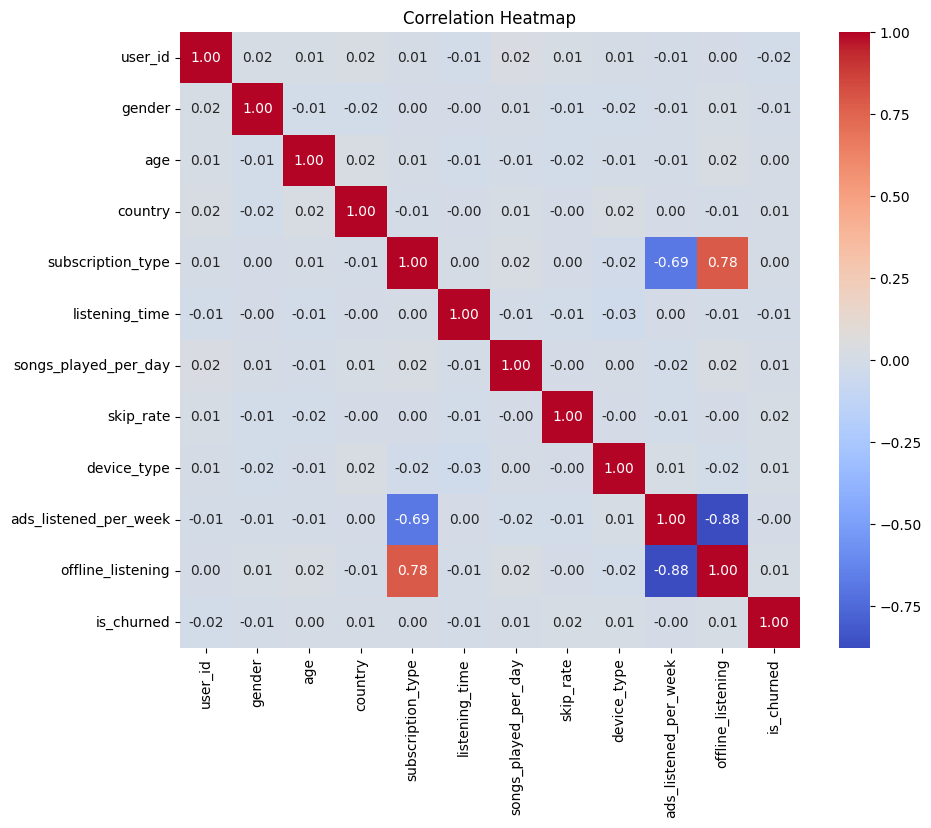

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df=df.drop('user_id',axis=1)

In [ ]:
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,0,54,0,0,26,23,0.20,0,31,0,1
1,1,33,1,1,141,62,0.34,1,0,1,0
2,2,38,2,2,199,38,0.04,2,0,1,1
3,0,22,0,3,36,2,0.31,2,0,1,0
4,1,29,3,1,250,57,0.36,2,0,1,1


In [ ]:
X=df.drop('is_churned',axis=1)
y=df['is_churned']

In [ ]:
X.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening
0,0,54,0,0,26,23,0.20,0,31,0
1,1,33,1,1,141,62,0.34,1,0,1
2,2,38,2,2,199,38,0.04,2,0,1
3,0,22,0,3,36,2,0.31,2,0,1
4,1,29,3,1,250,57,0.36,2,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

[[ 0.00210102 -0.05515228 -0.21949126 ...  1.24523281 -0.5075827
   0.57710971]
 [-1.22030902  0.65111075 -0.65601833 ...  0.01972305 -0.5075827
   0.57710971]
 [ 1.22451106 -1.15378366 -1.09254539 ... -1.20578671 -0.5075827
   0.57710971]
 ...
 [ 1.22451106  0.65111075 -0.65601833 ...  0.01972305 -0.5075827
   0.57710971]
 [-1.22030902 -1.62462567 -0.21949126 ...  0.01972305 -0.5075827
   0.57710971]
 [ 0.00210102  1.12195277 -1.52907245 ...  1.24523281 -0.5075827
   0.57710971]]


In [ ]:
model = LogisticRegression(class_weight='balanced')

In [ ]:
# Train the model with scaled data
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
# Predict with scaled test data
predict = model.predict(X_test_scaled)

In [ ]:
predict

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predict))
print("\nClassification Report:\n", classification_report(y_test, predict))
cm=confusion_matrix(y_test, predict)
print("\nConfusion Matrix:\n",cm )

Accuracy: 0.505

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.50      0.60      1200
           1       0.26      0.52      0.34       400

    accuracy                           0.51      1600
   macro avg       0.51      0.51      0.47      1600
weighted avg       0.63      0.51      0.54      1600


Confusion Matrix:
 [[601 599]
 [193 207]]


In [ ]:
cm

array([[601, 599],
       [193, 207]])

In [ ]:
TP =cm[0,0]
FP =cm[0,1]
FN =cm[1,0]
TN =cm[1,1]

In [ ]:
precision = TP/(TP+FP)
print(precision)

0.5008333333333334


In [ ]:
recall = TP/(TP+FN)
print(recall)

0.756926952141058


In [ ]:
accuracy_score = (TP+TN)/(TP+TN+FP+FN)
print(accuracy_score)

0.505


In [ ]:
f1_score = (2*precision*recall)/(precision+recall)
print(f1_score)

0.6028084252758275
